### Read and Visualize Time Series

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa import tsatools
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

- `pd.to_datetime` is a very convient function in `pandas` we often used to convert string into time series data.
- See its full documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [ ]:
## for example
x = pd.to_datetime("2021-12-02 14:00")
x

Timestamp('2021-12-02 14:00:00')

In [ ]:
x.year, x.month, x.day

(2021, 12, 2)

In [ ]:
(x - pd.to_datetime("2021-12-01 1:00")).total_seconds()

133200.0

In [ ]:
## read the Amtrak data
data = pd.read_csv("Amtrak.csv")
data.head()

,Month,Ridership,log_rider
0,Jan-91,1709,3.232742
1,Feb-91,1621,3.209783
2,Mar-91,1973,3.295127
3,Apr-91,1812,3.258158
4,May-91,1975,3.295567


In [ ]:
## parse string date time to timestamps
data['Date'] = pd.to_datetime(data.Month, format='%b-%y')
data = data[['Date', 'Ridership']]
data.head()

,Date,Ridership
0,1991-01-01,1709
1,1991-02-01,1621
2,1991-03-01,1973
3,1991-04-01,1812
4,1991-05-01,1975


<Axes: xlabel='Date'>

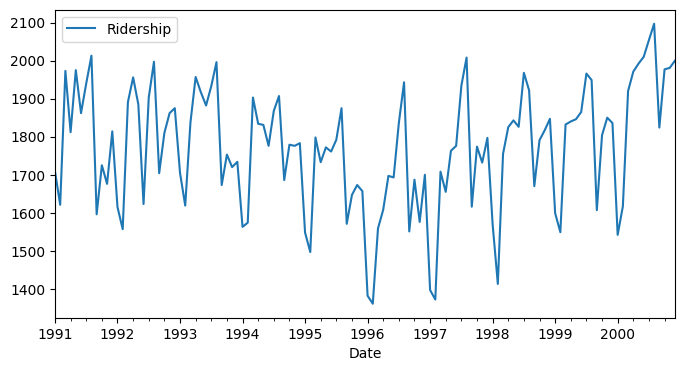

In [ ]:
# Visualize the data
data.plot(x="Date", y="Ridership", figsize=(8,4))

- Plot out Moving Average of a Time Series can often help us identify patterns within it.
- Pandas offers a very convient function `rolling` to calculate the moving average of a time series.

In [ ]:
## Moving average
data['MovingAverage_4month'] = data['Ridership'].rolling(4).mean()
data['MovingAverage_12month'] = data['Ridership'].rolling(12).mean()
data.head(15)

,Date,Ridership,MovingAverage_4month,MovingAverage_12month
0,1991-01-01,1709,NaN,NaN
1,1991-02-01,1621,NaN,NaN
2,1991-03-01,1973,NaN,NaN
3,1991-04-01,1812,1778.75,NaN
4,1991-05-01,1975,1845.25,NaN
5,1991-06-01,1862,1905.50,NaN
6,1991-07-01,1940,1897.25,NaN
7,1991-08-01,2013,1947.50,NaN
8,1991-09-01,1596,1852.75,NaN
9,1991-10-01,1725,1818.50,NaN


<Axes: xlabel='Date'>

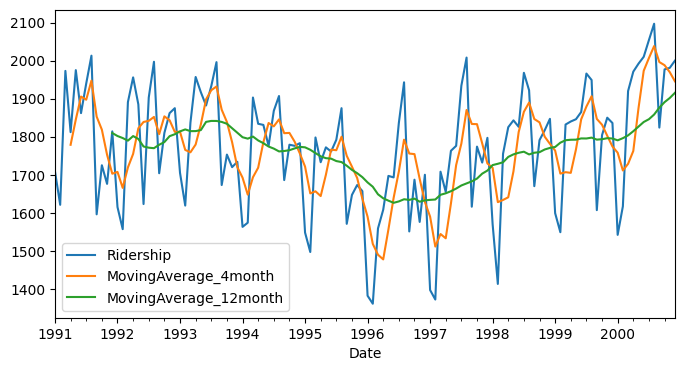

In [ ]:
## visualize
data.plot(x="Date", y=["Ridership",'MovingAverage_4month','MovingAverage_12month'], figsize=(8,4))

In [ ]:
## your code here
data['MovingAverage_6month'] = data['Ridership'].rolling(6).mean()
data.head(15)


,Date,Ridership,MovingAverage_4month,MovingAverage_12month,MovingAverage_6month
0,1991-01-01,1709,NaN,NaN,NaN
1,1991-02-01,1621,NaN,NaN,NaN
2,1991-03-01,1973,NaN,NaN,NaN
3,1991-04-01,1812,1778.75,NaN,NaN
4,1991-05-01,1975,1845.25,NaN,NaN
5,1991-06-01,1862,1905.50,NaN,1825.333333
6,1991-07-01,1940,1897.25,NaN,1863.833333
7,1991-08-01,2013,1947.50,NaN,1929.166667
8,1991-09-01,1596,1852.75,NaN,1866.333333
9,1991-10-01,1725,1818.50,NaN,1851.833333


<Axes: xlabel='Date'>

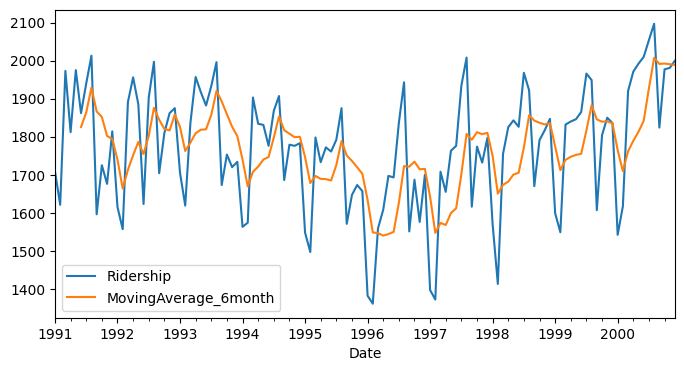

In [ ]:
data.plot(x="Date", y=["Ridership",'MovingAverage_6month'], figsize=(8,4))

### Stationary: differencing

To model time series, we often need to make it stationary.

To test whether a time series is stationary or not, we can apply the **Augmented Dickey-Fuller unit root test** or **ADFuller test**, which would be avaliable in `statsmodels.tsa.stattools`.

In [ ]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(data['Ridership'])

print(results)
print("The test ststistic is :", results[0])
print("The p-value is :", results[1])

(-0.07532378966600371, 0.9518415845983839, 12, 107, {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}, 1224.2202129801005)
The test ststistic is : -0.07532378966600371
The p-value is : 0.9518415845983839


Differencing is an effective way to make a time series stationary.

Taking difference once: $$\Delta Y = Y_{t}-Y_{t-1}$$

Taking difference multiple times:

![](https://www.radfordmathematics.com/algebra/sequences-series/difference-method-sequences/illustration-first-second-difference.jpg)

In [ ]:
## differencing
data['Rideership_shift'] = data['Ridership'].shift(1)
data['Ridership_diff'] = data['Ridership'].diff()
data['Ridership_diff2'] = data['Ridership_diff'].diff()

data.head(10)

,Date,Ridership,MovingAverage_4month,MovingAverage_12month,MovingAverage_6month,Rideership_shift,Ridership_diff,Ridership_diff2
0,1991-01-01,1709,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-02-01,1621,NaN,NaN,NaN,1709.0,-88.0,NaN
2,1991-03-01,1973,NaN,NaN,NaN,1621.0,352.0,440.0
3,1991-04-01,1812,1778.75,NaN,NaN,1973.0,-161.0,-513.0
4,1991-05-01,1975,1845.25,NaN,NaN,1812.0,163.0,324.0
5,1991-06-01,1862,1905.50,NaN,1825.333333,1975.0,-113.0,-276.0
6,1991-07-01,1940,1897.25,NaN,1863.833333,1862.0,78.0,191.0
7,1991-08-01,2013,1947.50,NaN,1929.166667,1940.0,73.0,-5.0
8,1991-09-01,1596,1852.75,NaN,1866.333333,2013.0,-417.0,-490.0
9,1991-10-01,1725,1818.50,NaN,1851.833333,1596.0,129.0,546.0


<Axes: xlabel='Date'>

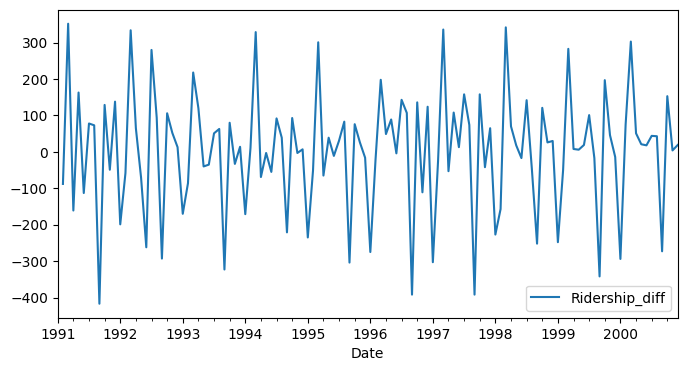

In [ ]:
data.plot(x="Date", y="Ridership_diff", figsize=(8,4))

In [ ]:
results = adfuller(data['Ridership_diff'].dropna())

print(results)
print("The test ststistic is :", results[0])
print("The p-value is :", results[1])

(-4.042568664466743, 0.0012033001357944434, 11, 107, {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}, 1211.9331306814147)
The test ststistic is : -4.042568664466743
The p-value is : 0.0012033001357944434


taking one difference already make the Ridership data much more stationary.

Beside taking differencing, you can also deliberately remove the trend and seasonality to make a time series stationary.

### Modeling Trend and Seasonality

In [ ]:
## let's reagrange the data to only keep the time series itself
ridership_ts = pd.Series(data['Ridership'].values, index=data['Date'], name="Ridership")
ridership_ts

Date
1991-01-01    1709
1991-02-01    1621
1991-03-01    1973
1991-04-01    1812
1991-05-01    1975
              ... 
2000-08-01    2097
2000-09-01    1824
2000-10-01    1977
2000-11-01    1981
2000-12-01    2000
Name: Ridership, Length: 120, dtype: int64

In [ ]:
## easy slicing
ridership_ts["1991-07":"1992-01"]

Date
1991-07-01    1940
1991-08-01    2013
1991-09-01    1596
1991-10-01    1725
1991-11-01    1676
1991-12-01    1814
1992-01-01    1615
Name: Ridership, dtype: int64

In [ ]:
## adding the trend, trend_square, and month terms
ridership_ts_df = tsatools.add_trend(ridership_ts, trend='ctt')
ridership_ts_df['Month'] = ridership_ts_df.index.month
ridership_ts_df

,Ridership,const,trend,trend_squared,Month
Date,,,,,
1991-01-01,1709,1.0,1.0,1.0,1
1991-02-01,1621,1.0,2.0,4.0,2
1991-03-01,1973,1.0,3.0,9.0,3
1991-04-01,1812,1.0,4.0,16.0,4
1991-05-01,1975,1.0,5.0,25.0,5
...,...,...,...,...,...
2000-08-01,2097,1.0,116.0,13456.0,8
2000-09-01,1824,1.0,117.0,13689.0,9
2000-10-01,1977,1.0,118.0,13924.0,10


In [ ]:
## fitting a linear trend
lm_ts = sm.formula.ols(formula='Ridership ~ trend', data=ridership_ts_df).fit()
ridership_ts_df['Ridership ~ Trend'] = lm_ts.predict(ridership_ts_df)
lm_ts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7224
Date:                Mon, 08 Apr 2024   Prob (F-statistic):              0.397
Time:                        02:36:29   Log-Likelihood:                -778.48
No. Observations:                 120   AIC:                             1561.
Df Residuals:                     118   BIC:                             1567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1750.1499     29.443     59.442      0.000    1691.845    1808.455
trend          0.3590      0.422      0.850      0.397      -0.477       1.195
==============================================================================
Omnibus:                        4.581   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.651
Skew:                          -0.464   Prob(JB):                       0.0977
Kurtosis:                       2.734   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Date'>

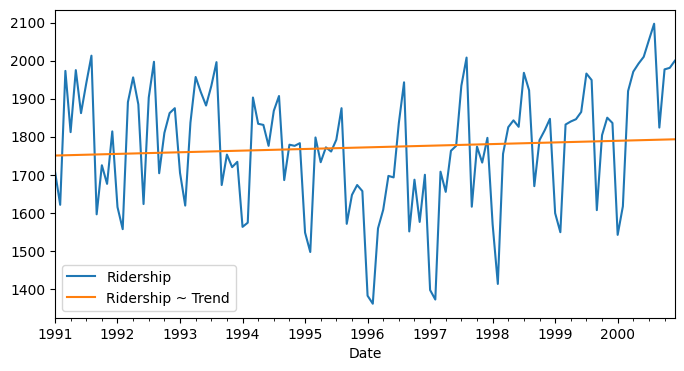

In [ ]:
ridership_ts_df[['Ridership', 'Ridership ~ Trend']].plot(figsize=(8,4))

In [ ]:
## fitting a polynomial trend
lm_ts = sm.formula.ols(formula='Ridership ~ trend + trend_squared', data=ridership_ts_df).fit()
ridership_ts_df['Ridership ~ Trend + TrendSquared'] = lm_ts.predict(ridership_ts_df)
lm_ts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     12.31
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.41e-05
Time:                        02:36:37   Log-Likelihood:                -767.39
No. Observations:                 120   AIC:                             1541.
Df Residuals:                     117   BIC:                             1549.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1899.8146     40.864     46.491      0.000    1818.885    1980.745
trend            -7.0016      1.559     -4.491      0.000     -10.089      -3.914
trend_squared     0.0608      0.012      4.873      0.000       0.036       0.086
==============================================================================
Omnibus:                        6.739   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.939
Skew:                          -0.563   Prob(JB):                       0.0311
Kurtosis:                       2.651   Cond. No.                     1.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='Date'>

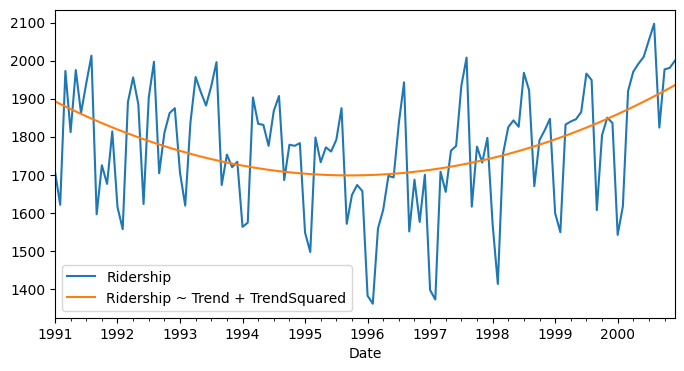

In [ ]:
ridership_ts_df[['Ridership', 'Ridership ~ Trend + TrendSquared']].plot(figsize=(8,4))

In [ ]:
## fit the seasonal effects
lm_ts = sm.formula.ols(formula='Ridership ~ C(Month)', data=ridership_ts_df).fit()
ridership_ts_df['Ridership ~ C(Month)'] = lm_ts.predict(ridership_ts_df)
lm_ts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     18.02
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           7.92e-20
Time:                        02:36:44   Log-Likelihood:                -716.31
No. Observations:                 120   AIC:                             1457.
Df Residuals:                     108   BIC:                             1490.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1563.0000     31.553     49.536      0.000    1500.457    1625.543
C(Month)[T.2]    -45.0000     44.622     -1.008      0.315    -133.449      43.449
C(Month)[T.3]    254.6000     44.622      5.706      0.000     166.151     343.049
C(Month)[T.4]    256.1000     44.622      5.739      0.000     167.651     344.549
C(Month)[T.5]    289.1000     44.622      6.479      0.000     200.651     377.549
C(Month)[T.6]    244.4000     44.622      5.477      0.000     155.951     332.849
C(Month)[T.7]    356.4000     44.622      7.987      0.000     267.951     444.849
C(Month)[T.8]    407.7000     44.622      9.137      0.000     319.251     496.149
C(Month)[T.9]     86.8000     44.622      1.945      0.054      -1.649     175.249
C(Month)[T.10]   211.7000     44.622      4.744      0.000     123.251     300.149
C(Month)[T.11]   203.3000     44.622      4.556      0.000     114.851     291.749
C(Month)[T.12]   241.3000     44.622      5.408      0.000     152.851     329.749
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   0.398
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.265
Skew:                          -0.104   Prob(JB):                        0.876
Kurtosis:                       2.902   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Date'>

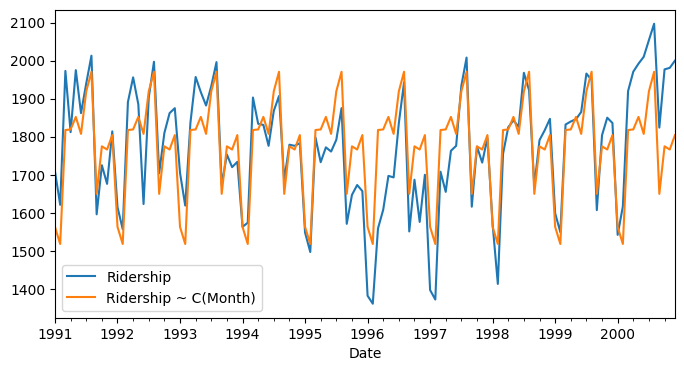

In [ ]:
ridership_ts_df[['Ridership', 'Ridership ~ C(Month)']].plot(figsize=(8,4))

In [ ]:
## combine trend and seasonality
lm_ts = sm.formula.ols(formula='Ridership ~ trend + trend_squared + C(Month)', data=ridership_ts_df).fit()
ridership_ts_df['Ridership ~ Trend + TrendSquare + C(Month)'] = lm_ts.predict(ridership_ts_df)
lm_ts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     37.44
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.21e-33
Time:                        02:36:50   Log-Likelihood:                -675.56
No. Observations:                 120   AIC:                             1379.
Df Residuals:                     106   BIC:                             1418.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1701.4746     29.078     58.515      0.000    1643.825    1759.124
C(Month)[T.2]    -44.5994     32.075     -1.390      0.167    -108.191      18.992
C(Month)[T.3]    255.2780     32.076      7.958      0.000     191.683     318.873
C(Month)[T.4]    256.9324     32.079      8.009      0.000     193.332     320.533
C(Month)[T.5]    289.9637     32.083      9.038      0.000     226.355     353.572
C(Month)[T.6]    245.1719     32.089      7.640      0.000     181.553     308.791
C(Month)[T.7]    356.9570     32.095     11.122      0.000     293.326     420.588
C(Month)[T.8]    407.9190     32.102     12.707      0.000     344.274     471.564
C(Month)[T.9]     86.5579     32.110      2.696      0.008      22.896     150.220
C(Month)[T.10]   210.8737     32.120      6.565      0.000     147.193     274.554
C(Month)[T.11]   201.7665     32.130      6.280      0.000     138.065     265.468
C(Month)[T.12]   238.9361     32.142      7.434      0.000     175.211     302.661
trend             -7.2321      0.762     -9.487      0.000      -8.743      -5.721
trend_squared      0.0615      0.006     10.087      0.000       0.049       0.074
==============================================================================
Omnibus:                        6.986   Durbin-Watson:                   0.779
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.527
Skew:                          -0.531   Prob(JB):                       0.0383
Kurtosis:                       3.420   Cond. No.                     8.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='Date'>

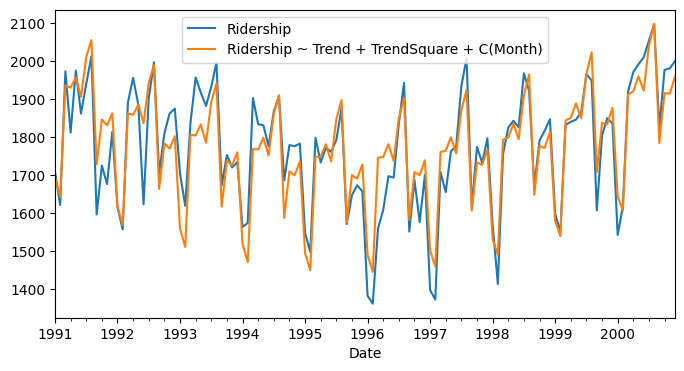

In [ ]:
ridership_ts_df[['Ridership', 'Ridership ~ Trend + TrendSquare + C(Month)']].plot(figsize=(8,4))

<Axes: xlabel='Date'>

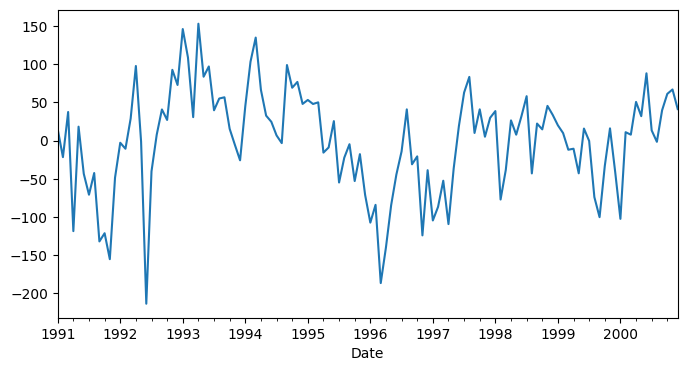

In [ ]:
## remove trend and seasonality effects
ridership_ts_df['resid'] = ridership_ts_df['Ridership'] - ridership_ts_df['Ridership ~ Trend + TrendSquare + C(Month)']
ridership_ts_df['resid'].plot(figsize=(8,4))

In [ ]:
results = adfuller(ridership_ts_df['resid'])

print(results)
print("The test ststistic is :", results[0])
print("The p-value is :", results[1])

(-5.30598592273001, 5.321467143678297e-06, 0, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, 1140.905395146211)
The test ststistic is : -5.30598592273001
The p-value is : 5.321467143678297e-06


- `statsmodels` offers a very convenient function to decompose trend and seasonality `seasonal_decompose`.
- Check it out here: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

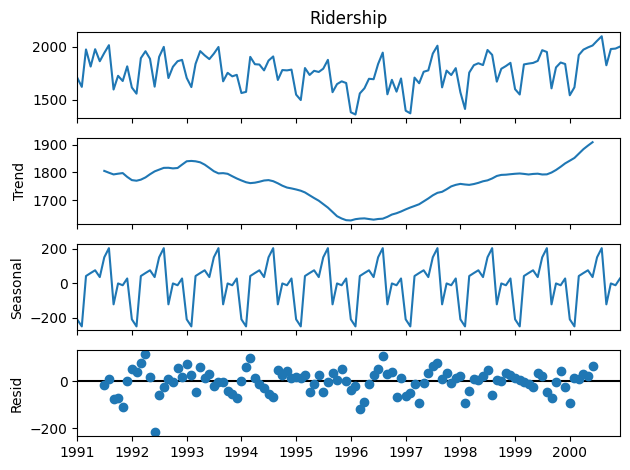

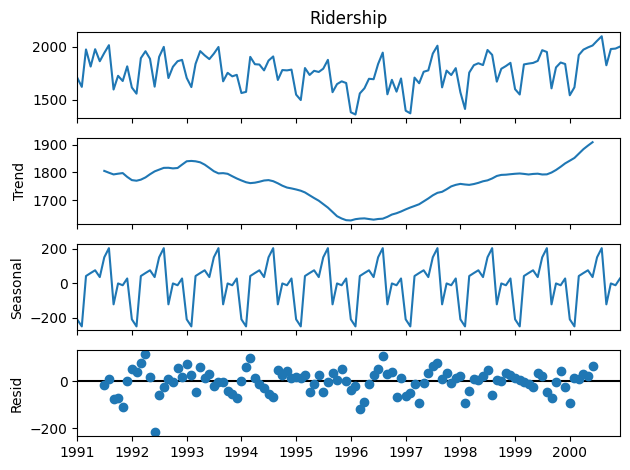

In [ ]:
# decomposing using seasonal_decompose
decomposition = sm.tsa.seasonal_decompose(ridership_ts_df['Ridership'], model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

decomposition.plot()

### Time Series Forecasting

In [ ]:
## Train-test split
## let's use the data observed in the previous years (1991-1999) to predict the last year's data (2000)

X = ridership_ts["1991-01":"1999-12"]
Y = ridership_ts["2000-1":]

print("training", len(X))
print("testing", len(Y))

training 108
testing 12


### Holt-Winters Smoothing Forecasting

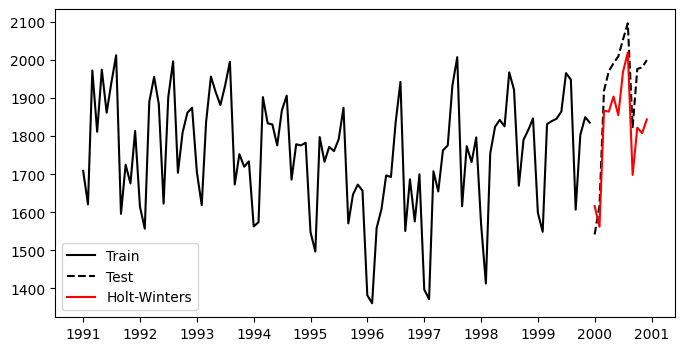

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(X, seasonal='add', seasonal_periods=12).fit()
pred = model.predict(start=Y.index[0], end=Y.index[-1])

plt.figure(figsize=(8,4))
plt.plot(X.index, X, 'k-',label='Train', )
plt.plot(Y.index, Y, 'k--',label='Test')
plt.plot(pred.index, pred, 'r-',label='Holt-Winters')
plt.legend(loc='best')

In [ ]:
## let's check the Mean absolute error of the prediction

from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y.values, pred)

108.41839023399685

### SARIMA Model

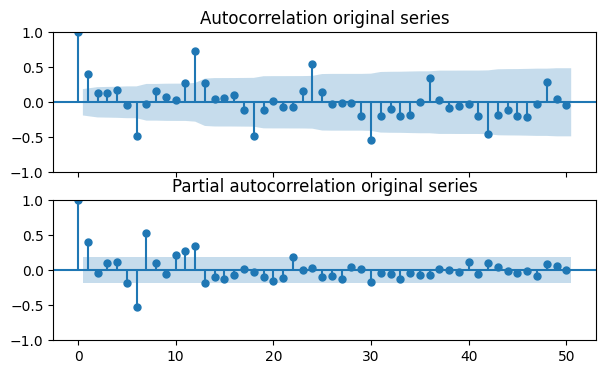

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot for original and differenced series
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 4), sharex=True)
plot_acf(X, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelation original series')
plot_pacf(X, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Partial autocorrelation original series');

In [ ]:
# SARIMA Model Order
p, d, q = 6, 2, 6  # Non-seasonal orders
P, D, Q, S = 1, 1, 1, 12  # Seasonal orders
model = sm.tsa.SARIMAX(X, order=(p, d, q), seasonal_order=(P, D, Q, S)).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Ridership   No. Observations:                  108
Model:             SARIMAX(6, 2, 6)x(1, 1, [1], 12)   Log Likelihood                -529.376
Date:                              Mon, 08 Apr 2024   AIC                           1088.752
Time:                                      02:37:31   BIC                           1126.902
Sample:                                  01-01-1991   HQIC                          1104.162
                                       - 12-01-1999                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7205      1.883     -0.383      0.702      -4.410       2.969
ar.L2          0.7566      1.212      0.624      0.532      -1.619       3.132
ar.L3          0.3754      2.058      0.182      0.855      -3.659       4.409
ar.L4         -0.5329      0.857     -0.622      0.534      -2.213       1.147
ar.L5         -0.2425      1.167     -0.208      0.835      -2.531       2.046
ar.L6         -0.1103      0.286     -0.385      0.700      -0.672       0.451
ma.L1         -0.6545      1.922     -0.340      0.734      -4.422       3.113
ma.L2         -1.5037      1.641     -0.916      0.360      -4.721       1.713
ma.L3          0.9575      2.987      0.321      0.749      -4.896       6.811
ma.L4          0.8195      2.436      0.336      0.737      -3.955       5.594
ma.L5         -0.5985      1.666     -0.359      0.719      -3.864       2.667
ma.L6         -0.0090      1.378     -0.007      0.995      -2.710       2.692
ar.S.L12       0.0383      0.270      0.142      0.887      -0.491       0.568
ma.S.L12      -0.7830      0.380     -2.060      0.039      -1.528      -0.038
sigma2      4095.0420   1363.516      3.003      0.003    1422.599    6767.485
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.70   Prob(JB):                         0.57
Heteroskedasticity (H):               0.48   Skew:                            -0.19
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
## make a forcast
forecast = model.get_forecast(steps=12)   # get forecast in the upcoming 30 days
pred = forecast.predicted_mean  # forecast mean
confidence_intervals = forecast.conf_int()  # Get confidence intervals of forecasts
lower_limits = confidence_intervals.values[:,0]
upper_limits = confidence_intervals.values[:,1]

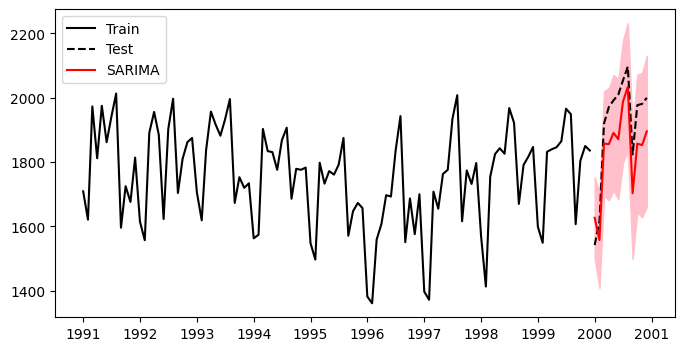

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(X.index, X, 'k-',label='Train', )
plt.plot(Y.index, Y, 'k--',label='Test')
plt.plot(pred.index, pred, 'r-', label='SARIMA')
plt.fill_between(Y.index, lower_limits, upper_limits, color='pink')
plt.legend(loc='best')

In [ ]:
mean_absolute_error(Y.values, pred)

97.00353305958119

In [ ]:

# SARIMA Model Order
p, d, q = 7, 1, 6  # Non-seasonal orders
P, D, Q, S = 1, 1, 1, 12  # Seasonal orders
model = sm.tsa.SARIMAX(X, order=(p, d, q), seasonal_order=(P, D, Q, S)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Ridership   No. Observations:                  108
Model:             SARIMAX(7, 1, 6)x(1, 1, [1], 12)   Log Likelihood                -528.769
Date:                              Mon, 08 Apr 2024   AIC                           1089.539
Time:                                      02:39:54   BIC                           1130.401
Sample:                                  01-01-1991   HQIC                          1106.050
                                       - 12-01-1999                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0635      0.389      0.163      0.870      -0.698       0.825
ar.L2          0.6758      0.370      1.827      0.068      -0.049       1.401
ar.L3         -0.9593      0.285     -3.362      0.001      -1.519      -0.400
ar.L4          0.1753      0.253      0.692      0.489      -0.321       0.671
ar.L5          0.4414      0.277      1.595      0.111      -0.101       0.984
ar.L6         -0.5963      0.222     -2.685      0.007      -1.032      -0.161
ar.L7         -0.2456      0.214     -1.150      0.250      -0.664       0.173
ma.L1         -0.5407      0.412     -1.312      0.190      -1.349       0.267
ma.L2         -0.6642      0.696     -0.954      0.340      -2.028       0.700
ma.L3          1.3115      0.537      2.443      0.015       0.259       2.364
ma.L4         -0.7931      0.983     -0.807      0.420      -2.719       1.133
ma.L5         -0.4177      0.360     -1.160      0.246      -1.124       0.288
ma.L6          0.8753      0.606      1.444      0.149      -0.312       2.063
ar.S.L12       0.1395      0.274      0.509      0.611      -0.398       0.677
ma.S.L12      -0.9863      5.525     -0.179      0.858     -11.815       9.843
sigma2      3372.2822   1.83e+04      0.185      0.854   -3.24e+04    3.92e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.89   Prob(JB):                         0.96
Heteroskedasticity (H):               0.51   Skew:                            -0.07
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
## make a forcast
forecast = model.get_forecast(steps=12)   # get forecast in the upcoming 30 days
pred = forecast.predicted_mean  # forecast mean
confidence_intervals = forecast.conf_int()  # Get confidence intervals of forecasts
lower_limits = confidence_intervals.values[:,0]
upper_limits = confidence_intervals.values[:,1]

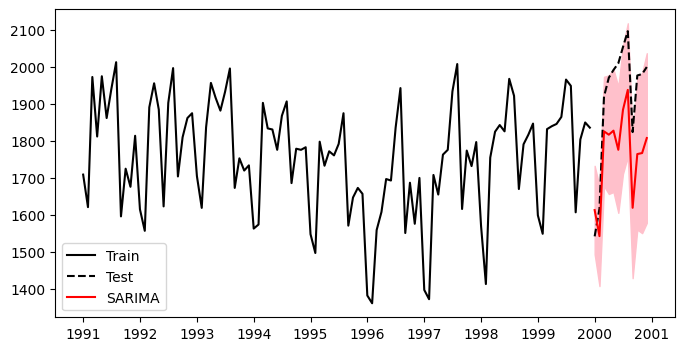

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(X.index, X, 'k-',label='Train', )
plt.plot(Y.index, Y, 'k--',label='Test')
plt.plot(pred.index, pred, 'r-', label='SARIMA')
plt.fill_between(Y.index, lower_limits, upper_limits, color='pink')
plt.legend(loc='best')

In [ ]:
mean_absolute_error(Y.values, pred)

161.95514266680806

SARIMAX(6, 2, 6) works better than SARIMAX(7, 1, 6) as SARIMAX(6, 2, 6) has lower AIC/BIC value and lower mean absolute error

### The ML approach

#### One Step Ahead Forecasting
![One Step Ahead Forecasting](https://mlpills.dev/wp-content/uploads/2023/01/sliding-window.png)

Well, compared with ARIMA, the ML approach is more **brutal force**. We will simply use a rolling window (prices in preivous X days) to make next day's price.

In [ ]:
#first transform the dataset a little bit.

def preprocessing(x, window=13):
    ## x is the time series, the default window size is 13, 12 months as features, the last feature (month=13) in this window as Y
    x = np.array(x)
    result = []     # saving the results
    for i in range(len(x)-window):
        result.append(x[i:i+window])    ## slice the data every 12 months
    result = np.stack(result, axis=0)    ## stacked the sliced data together
    return result

In [ ]:
ridership_ts_trans = preprocessing(ridership_ts)
X = ridership_ts_trans[:-12,:]
Y = ridership_ts_trans[-12:,:]  # last 12 months as our test dataset

print("shape of X and Y:")
print(ridership_ts_trans.shape, X.shape, Y.shape)

shape of X and Y:
(107, 13) (95, 13) (12, 13)


In [ ]:
X[:1,:]

array([[1709, 1621, 1973, 1812, 1975, 1862, 1940, 2013, 1596, 1725, 1676,
        1814, 1615]])

In [ ]:
X[:5,:]  # first 5 rows

array([[1709, 1621, 1973, 1812, 1975, 1862, 1940, 2013, 1596, 1725, 1676,
        1814, 1615],
       [1621, 1973, 1812, 1975, 1862, 1940, 2013, 1596, 1725, 1676, 1814,
        1615, 1557],
       [1973, 1812, 1975, 1862, 1940, 2013, 1596, 1725, 1676, 1814, 1615,
        1557, 1891],
       [1812, 1975, 1862, 1940, 2013, 1596, 1725, 1676, 1814, 1615, 1557,
        1891, 1956],
       [1975, 1862, 1940, 2013, 1596, 1725, 1676, 1814, 1615, 1557, 1891,
        1956, 1885]])

In [ ]:
## forcaste with Random Forests

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500)
model.fit(X[:, :12], X[:,12])  ## use the first 12 columns as X, the last column as Y

pred = model.predict(Y[:,:12])   ## predict on the test dataset

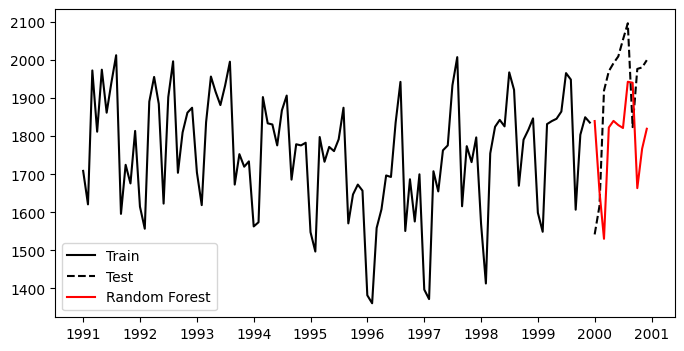

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(ridership_ts.index[:-12], ridership_ts[:-12], 'k-',label='Train', )
plt.plot(ridership_ts.index[-12:], ridership_ts[-12:], 'k--',label='Test')
plt.plot(ridership_ts.index[-12:], pred, 'r-', label='Random Forest')
plt.legend(loc='best')

In [ ]:
mean_absolute_error(Y[:,12], pred)

131.69583333333333

In [ ]:
## your code here
def preprocessing(x, window=25):
    ## x is the time series, the default window size is 25, 24 months as features, the last feature (month=25) in this window as Y
    x = np.array(x)
    result = []     # saving the results
    for i in range(len(x)-window):
        result.append(x[i:i+window])    ## slice the data every 24 months
    result = np.stack(result, axis=0)    ## stacked the sliced data together
    return result

In [ ]:
ridership_ts_trans = preprocessing(ridership_ts)
X = ridership_ts_trans[:-12,:]
Y = ridership_ts_trans[-12:,:]  # last 12 months as our test dataset

print("shape of X and Y:")
print(ridership_ts_trans.shape, X.shape, Y.shape)

shape of X and Y:
(95, 25) (83, 25) (12, 25)


In [ ]:
X[:1,:]

array([[1709, 1621, 1973, 1812, 1975, 1862, 1940, 2013, 1596, 1725, 1676,
        1814, 1615, 1557, 1891, 1956, 1885, 1623, 1903, 1997, 1704, 1810,
        1862, 1875, 1705]])

In [ ]:
## forcaste with Random Forests

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500)
model.fit(X[:, :24], X[:,24])  ## use the first 24 columns as X, the last column as Y

pred = model.predict(Y[:,:24])

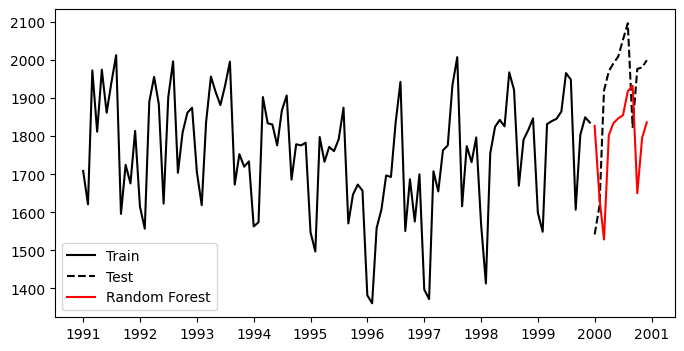

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(ridership_ts.index[:-12], ridership_ts[:-12], 'k-',label='Train', )
plt.plot(ridership_ts.index[-12:], ridership_ts[-12:], 'k--',label='Test')
plt.plot(ridership_ts.index[-12:], pred, 'r-', label='Random Forest')
plt.legend(loc='best')

In [ ]:
mean_absolute_error(Y[:,24], pred)

128.73766666666666

for the window size = 12 mean_absolute_error = 131.69583333333333,
for the window size = 24 mean_absolute_error = 128.73766666666666,

hence the predictions improve.

In [ ]:
def preprocessing(x, window=25):
    ## x is the time series, the default window size is 25, 24 months as features, the last feature (month=25) in this window as Y
    x = np.array(x)
    result = []     # saving the results
    for i in range(len(x)-window):
        result.append(x[i:i+window])    ## slice the data every 24 months
    result = np.stack(result, axis=0)    ## stacked the sliced data together
    return result

In [ ]:
ridership_ts_trans = preprocessing(ridership_ts)
X = ridership_ts_trans[:-12,:]
Y = ridership_ts_trans[-12:,:]  # last 12 months as our test dataset

print("shape of X and Y:")
print(ridership_ts_trans.shape, X.shape, Y.shape)

shape of X and Y:
(95, 25) (83, 25) (12, 25)


In [ ]:
X[:1,:]

array([[1709, 1621, 1973, 1812, 1975, 1862, 1940, 2013, 1596, 1725, 1676,
        1814, 1615, 1557, 1891, 1956, 1885, 1623, 1903, 1997, 1704, 1810,
        1862, 1875, 1705]])

In [ ]:
## forcaste with Support Vector Regressor

from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X[:, :24], X[:,24])  ## use the first 24 columns as X, the last column as Y

pred = model.predict(Y[:,:24])

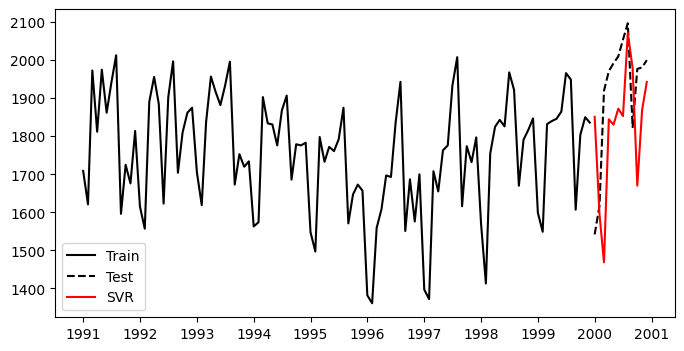

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(ridership_ts.index[:-12], ridership_ts[:-12], 'k-',label='Train', )
plt.plot(ridership_ts.index[-12:], ridership_ts[-12:], 'k--',label='Test')
plt.plot(ridership_ts.index[-12:], pred, 'r-', label='SVR')
plt.legend(loc='best')

In [ ]:
mean_absolute_error(Y[:,24], pred)

95.32809633956488